In [205]:
import xgboost as xgb
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gzip
import codecs
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate,GridSearchCV,train_test_split
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [164]:
train_path = "Train_nyOWmfK.csv"
test_path = "Test_bCtAN1w.csv"

In [165]:
train = pd.read_csv(train_path, sep=',', engine='python',parse_dates=True)
test = pd.read_csv(test_path,sep=',',engine='python')
train.shape, test.shape

((87020, 26), (37717, 24))

In [166]:
train.head()

,id,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [167]:
train.dtypes

id                        object
Gender                    object
City                      object
Monthly_Income             int64
DOB                       object
Lead_Creation_Date        object
Loan_Amount_Applied      float64
Loan_Tenure_Applied      float64
Existing_EMI             float64
Employer_Name             object
Salary_Account            object
Mobile_Verified           object
Var5                       int64
Var1                      object
Loan_Amount_Submitted    float64
Loan_Tenure_Submitted    float64
Interest_Rate            float64
Processing_Fee           float64
EMI_Loan_Submitted       float64
Filled_Form               object
Device_Type               object
Var2                      object
Source                    object
Var4                       int64
LoggedIn                   int64
Disbursed                  int64
dtype: object

In [168]:
train.describe()

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Var4,LoggedIn,Disbursed
count,8.702000e+04,8.694900e+04,86949.000000,8.694900e+04,87020.000000,5.240700e+04,52407.000000,27726.000000,27420.000000,27726.000000,87020.000000,87020.000000,87020.000000
mean,5.884997e+04,2.302507e+05,2.131399,3.696228e+03,4.961503,3.950106e+05,3.891369,19.197474,5131.150839,10999.528377,2.949805,0.029350,0.014629
std,2.177511e+06,3.542068e+05,2.014193,3.981021e+04,5.670385,3.082481e+05,1.165359,5.834213,4725.837644,7512.323050,1.697720,0.168785,0.120062
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e+04,1.000000,11.990000,200.000000,1176.410000,0.000000,0.000000,0.000000
25%,1.650000e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000e+05,3.000000,15.250000,2000.000000,6491.600000,1.000000,0.000000,0.000000
50%,2.500000e+04,1.000000e+05,2.000000,0.000000e+00,2.000000,3.000000e+05,4.000000,18.000000,4000.000000,9392.970000,3.000000,0.000000,0.000000
75%,4.000000e+04,3.000000e+05,4.000000,3.500000e+03,11.000000,5.000000e+05,5.000000,20.000000,6250.000000,12919.040000,5.000000,0.000000,0.000000
max,4.445544e+08,1.000000e+07,10.000000,1.000000e+07,18.000000,3.000000e+06,6.000000,37.000000,50000.000000,144748.280000,7.000000,1.000000,1.000000


In [169]:
print(train.columns)
print(test.columns)


Index(['id', 'Gender', 'City', 'Monthly_Income', 'DOB', 'Lead_Creation_Date',
       'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4', 'LoggedIn', 'Disbursed'],
      dtype='object')
Index(['ï»¿id', 'Gender', 'City', 'Monthly_Income', 'DOB',
       'Lead_Creation_Date', 'Loan_Amount_Applied', 'Loan_Tenure_Applied',
       'Existing_EMI', 'Employer_Name', 'Salary_Account', 'Mobile_Verified',
       'Var5', 'Var1', 'Loan_Amount_Submitted', 'Loan_Tenure_Submitted',
       'Interest_Rate', 'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form',
       'Device_Type', 'Var2', 'Source', 'Var4'],
      dtype='object')


In [170]:
train['source']= 'train'
test['source'] = 'test'

data=pd.concat([train, test],ignore_index=True,sort=False)
#data.tail()
cols_to_drop = [data.columns[0],data.columns[27]]
data = data.drop(columns = cols_to_drop)
data.head()

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,source
0,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,...,NaN,NaN,N,Web-browser,G,S122,1,0.0,0.0,train
1,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,...,NaN,6762.9,N,Web-browser,G,S122,3,0.0,0.0,train
2,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,...,NaN,NaN,N,Web-browser,B,S143,1,0.0,0.0,train
3,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,...,NaN,NaN,N,Web-browser,B,S143,3,0.0,0.0,train
4,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,...,NaN,NaN,N,Web-browser,B,S134,3,1.0,0.0,train


In [171]:
# Check missing
print("Data shape: ",data.shape)
number_rows = data.shape[0]

missing_vals = data.apply(lambda x: x.isnull().sum())
missing_cols_percent = missing_vals[missing_vals>0]
print(missing_cols)
print("Distribution: ")
for index in range(len(missing_cols)):
    print(missing_cols.index[index]," percentage null : ",np.round((missing_cols[index]/number_rows)*100,3),"%")

Data shape:  (124737, 26)
City                      1401
Loan_Amount_Applied        111
Loan_Tenure_Applied        111
Existing_EMI               111
Employer_Name              113
Salary_Account           16801
Loan_Amount_Submitted    49535
Loan_Tenure_Submitted    49535
Interest_Rate            84901
Processing_Fee           85345
EMI_Loan_Submitted       84901
LoggedIn                 37717
Disbursed                37717
dtype: int64
Distribution: 
City  percentage null :  1.123 %
Loan_Amount_Applied  percentage null :  0.089 %
Loan_Tenure_Applied  percentage null :  0.089 %
Existing_EMI  percentage null :  0.089 %
Employer_Name  percentage null :  0.091 %
Salary_Account  percentage null :  13.469 %
Loan_Amount_Submitted  percentage null :  39.712 %
Loan_Tenure_Submitted  percentage null :  39.712 %
Interest_Rate  percentage null :  68.064 %
Processing_Fee  percentage null :  68.42 %
EMI_Loan_Submitted  percentage null :  68.064 %
LoggedIn  percentage null :  30.237 %
Disbursed  pe

In [172]:
object_cols = ['City','Gender','Salary_Account','Mobile_Verified','Var1','Filled_Form','Device_Type','Var2','Source']
print("Object columns: ")
print(object_cols)

Object columns: 
['City', 'Gender', 'Salary_Account', 'Mobile_Verified', 'Var1', 'Filled_Form', 'Device_Type', 'Var2', 'Source']


In [173]:
#Cat cols unique counts
for col in object_cols:
    print(str(data[col].value_counts())+"\n")

Delhi        17936
Bengaluru    15522
Mumbai       15425
Hyderabad    10410
Chennai       9895
             ...  
CHOTILA          1
UDWADA           1
Panna            1
Kannauj          1
Geyzing          1
Name: City, Length: 723, dtype: int64

Male      71398
Female    53339
Name: Gender, dtype: int64

HDFC Bank                                          25180
ICICI Bank                                         19547
State Bank of India                                17110
Axis Bank                                          12590
Citibank                                            3398
Kotak Bank                                          2955
IDBI Bank                                           2213
Punjab National Bank                                1747
Bank of India                                       1713
Bank of Baroda                                      1675
Standard Chartered Bank                             1434
Canara Bank                                         1385
Union Ba

In [174]:
# Cardinality
for col in object_cols:
    print(col+", cardinality: ",data[col].nunique())

City, cardinality:  723
Gender, cardinality:  2
Salary_Account, cardinality:  58
Mobile_Verified, cardinality:  2
Var1, cardinality:  19
Filled_Form, cardinality:  2
Device_Type, cardinality:  2
Var2, cardinality:  7
Source, cardinality:  34


In [182]:
#DATA CLEAN

data['Age']=data['DOB'].apply(lambda x: 120 - int(x[-2:]))
data['EMI_Loan_Submitted_Missing']=data['EMI_Loan_Submitted'].isnull().astype('int')
data['Interest_Rate_Missing']=data['Interest_Rate'].isnull().astype('int')
data['Processing_Fee_Missing']=data['Processing_Fee'].isnull().astype('int')
data['Loan_Amount_Submitted_Missing']=data['Loan_Amount_Submitted'].isnull().astype('int')
data['Loan_Tenure_Submitted_Missing']=data['Loan_Tenure_Submitted'].isnull().astype('int')

simple_imputer = SimpleImputer(missing_values=np.nan,strategy='median')
cols = ["Loan_Amount_Applied","Loan_Tenure_Applied","Existing_EMI"]
imputed_data = pd.DataFrame(simple_imputer.fit_transform(data[cols]))
imputed_data.columns = data[cols].columns
data[cols]=imputed_data[cols].values

cols_to_drop = ["City","DOB","EMI_Loan_Submitted","Interest_Rate","Processing_Fee","Loan_Amount_Submitted",
               "Loan_Tenure_Submitted","Employer_Name","Lead_Creation_Date","LoggedIn","Salary_Account"]
data['Source'] = data['Source'].apply(lambda x: 'others' if x not in ['S122','S133'] else x)
data = data.drop(columns=cols_to_drop,axis=1)
data.head()


,Gender,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Mobile_Verified,Var5,Var1,Filled_Form,Device_Type,...,Source,Var4,Disbursed,source,Age,EMI_Loan_Submitted_Missing,Interest_Rate_Missing,Processing_Fee_Missing,Loan_Amount_Submitted_Missing,Loan_Tenure_Submitted_Missing
0,Female,20000,300000.0,5.0,0.0,N,0,HBXX,N,Web-browser,...,S122,1,0.0,train,42,1,1,1,1,1
1,Male,35000,200000.0,2.0,0.0,Y,13,HBXA,N,Web-browser,...,S122,3,0.0,train,35,0,0,1,0,0
2,Male,22500,600000.0,4.0,0.0,Y,0,HBXX,N,Web-browser,...,others,1,0.0,train,39,1,1,1,0,0
3,Male,35000,1000000.0,5.0,0.0,Y,10,HBXX,N,Web-browser,...,others,3,0.0,train,33,1,1,1,0,0
4,Male,100000,500000.0,2.0,25000.0,Y,17,HBXX,N,Web-browser,...,others,3,0.0,train,36,1,1,1,0,0


In [183]:
data.apply(lambda x: sum(x.isnull()))

Gender                               0
Monthly_Income                       0
Loan_Amount_Applied                  0
Loan_Tenure_Applied                  0
Existing_EMI                         0
Mobile_Verified                      0
Var5                                 0
Var1                                 0
Filled_Form                          0
Device_Type                          0
Var2                                 0
Source                               0
Var4                                 0
Disbursed                        37717
source                               0
Age                                  0
EMI_Loan_Submitted_Missing           0
Interest_Rate_Missing                0
Processing_Fee_Missing               0
Loan_Amount_Submitted_Missing        0
Loan_Tenure_Submitted_Missing        0
dtype: int64

In [187]:
le = LabelEncoder()
var_to_encode = ['Device_Type','Filled_Form','Gender','Var1','Var2','Mobile_Verified','Source']
for col in var_to_encode:
    data[col] = le.fit_transform(data[col])
data = pd.get_dummies(data, columns=var_to_encode)
data.columns

Index(['Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied',
       'Existing_EMI', 'Var5', 'Var4', 'Disbursed', 'source', 'Age',
       'EMI_Loan_Submitted_Missing', 'Interest_Rate_Missing',
       'Processing_Fee_Missing', 'Loan_Amount_Submitted_Missing',
       'Loan_Tenure_Submitted_Missing', 'Device_Type_0', 'Device_Type_1',
       'Filled_Form_0', 'Filled_Form_1', 'Gender_0', 'Gender_1', 'Var1_0',
       'Var1_1', 'Var1_2', 'Var1_3', 'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7',
       'Var1_8', 'Var1_9', 'Var1_10', 'Var1_11', 'Var1_12', 'Var1_13',
       'Var1_14', 'Var1_15', 'Var1_16', 'Var1_17', 'Var1_18', 'Var2_0',
       'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4', 'Var2_5', 'Var2_6',
       'Mobile_Verified_0', 'Mobile_Verified_1', 'Source_0', 'Source_1',
       'Source_2'],
      dtype='object')

In [188]:
data.head()

,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Var4,Disbursed,source,Age,EMI_Loan_Submitted_Missing,...,Var2_2,Var2_3,Var2_4,Var2_5,Var2_6,Mobile_Verified_0,Mobile_Verified_1,Source_0,Source_1,Source_2
0,20000,300000.0,5.0,0.0,0,1,0.0,train,42,1,...,0,0,0,0,1,1,0,1,0,0
1,35000,200000.0,2.0,0.0,13,3,0.0,train,35,0,...,0,0,0,0,1,0,1,1,0,0
2,22500,600000.0,4.0,0.0,0,1,0.0,train,39,1,...,0,0,0,0,0,0,1,0,0,1
3,35000,1000000.0,5.0,0.0,10,3,0.0,train,33,1,...,0,0,0,0,0,0,1,0,0,1
4,100000,500000.0,2.0,25000.0,17,3,0.0,train,36,1,...,0,0,0,0,0,0,1,0,0,1


In [189]:
train = data.loc[data['source']=='train']
test = data.loc[data['source']=='test']
train.drop('source',axis=1,inplace=True)
test.drop(['source','Disbursed'],axis=1,inplace=True)
train.to_csv('train_modified.csv',index=False)
test.to_csv('test_modified.csv',index=False)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [195]:
# Model 

In [197]:
train = pd.read_csv('train_modified.csv')
test = pd.read_csv('test_modified.csv')
train.shape, test.shape

((87020, 50), (37717, 49))

In [207]:
y = train.Disbursed
target = "Disbursed"
X = train.drop(['Disbursed'],axis=1)

In [202]:
X.columns

Index(['Monthly_Income', 'Loan_Amount_Applied', 'Loan_Tenure_Applied',
       'Existing_EMI', 'Var5', 'Var4', 'Age', 'EMI_Loan_Submitted_Missing',
       'Interest_Rate_Missing', 'Processing_Fee_Missing',
       'Loan_Amount_Submitted_Missing', 'Loan_Tenure_Submitted_Missing',
       'Device_Type_0', 'Device_Type_1', 'Filled_Form_0', 'Filled_Form_1',
       'Gender_0', 'Gender_1', 'Var1_0', 'Var1_1', 'Var1_2', 'Var1_3',
       'Var1_4', 'Var1_5', 'Var1_6', 'Var1_7', 'Var1_8', 'Var1_9', 'Var1_10',
       'Var1_11', 'Var1_12', 'Var1_13', 'Var1_14', 'Var1_15', 'Var1_16',
       'Var1_17', 'Var1_18', 'Var2_0', 'Var2_1', 'Var2_2', 'Var2_3', 'Var2_4',
       'Var2_5', 'Var2_6', 'Mobile_Verified_0', 'Mobile_Verified_1',
       'Source_0', 'Source_1', 'Source_2'],
      dtype='object')

In [216]:
y.value_counts()
X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size=0.8,random_state=42)

In [1]:
def modelfit(alg,predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train[predictors].values, label=y_train.values)
        xgtest = xgb.DMatrix(X_valid[predictors].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(X_train[predictors],y_train,eval_metric='auc')
        
    #Predict val set:
    dvalid_predictions = alg.predict(X_valid[predictors])
    dvalid_predprob = alg.predict_proba(X_valid[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g",metrics.accuracy_score(y_valid, dvalid_predictions))
    print ("AUC Score (Train): %f",metrics.roc_auc_score(y_valid, dvalid_predprob))
                
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [2]:
#FINDING NUM ESTIMATORS FOR HIGH LEARNING

predictors = [x for x in X_train.columns if x not in [target]]
xgb1 = XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective= 'binary:logistic',
        scale_pos_weight=1,
        seed=27)
modelfit(xgb1,predictors)
print(xgb1.get_params()['n_estimators'])

NameError: name 'X_train' is not defined

In [227]:
best_n_estimators_1 = 105
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=best_n_estimators_1, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',iid=False, cv=5)
gsearch1.fit(X_train[predictors],y_train)
print("Params: ",gsearch1.best_params_)
print("Best score: ",gsearch1.best_score_)

Params:  {'max_depth': 5, 'min_child_weight': 5}
Best score:  0.8397823087715031


In [229]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=best_n_estimators_1, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(X_train[predictors],y_train)
print("Params: ",gsearch2.best_params_)
print("Best score: ",gsearch2.best_score_)

Params:  {'max_depth': 5, 'min_child_weight': 5}
Best score:  0.8397823087715031


In [230]:
param_test3 = {
 'min_child_weight':[8,10,12]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=best_n_estimators_1, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(X_train[predictors],y_train)
print("Params: ",gsearch3.best_params_)
print("Best score: ",gsearch3.best_score_)

Params:  {'min_child_weight': 12}
Best score:  0.8413592331725089


In [231]:
param_test4 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=best_n_estimators_1, max_depth=5,
 min_child_weight=12, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',scale_pos_weight=1, seed=27), 
 param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(X_train[predictors],y_train)
print("Params: ",gsearch4.best_params_)
print("Best score: ",gsearch4.best_score_)

Params:  {'gamma': 0.2}
Best score:  0.8414257823115172



Model Report
Accuracy : %.4g 0.9852332797058148
AUC Score (Train): %f 0.8388188969766808
106


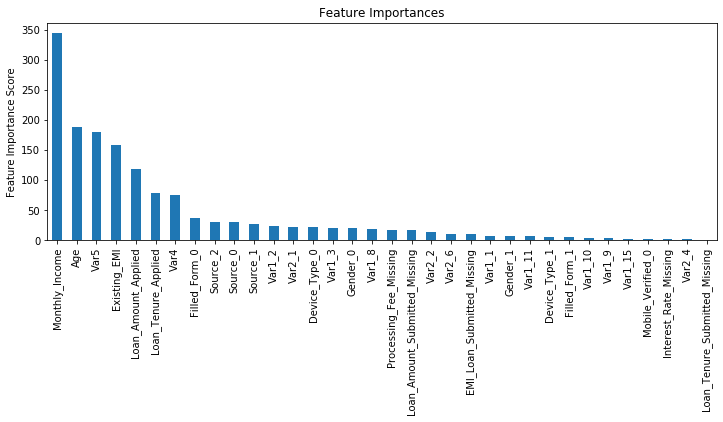

In [232]:
xgb2 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=12,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scale_pos_weight=1,
 seed=27)
modelfit(xgb2,predictors)
print(xgb2.get_params()['n_estimators'])

In [233]:
best_n_estimators_2 = 106
param_test5 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=best_n_estimators_2, max_depth=5,
 min_child_weight=12, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',scale_pos_weight=1, seed=27), 
 param_grid = param_test5, scoring='roc_auc',iid=False, cv=5)
gsearch5.fit(X_train[predictors],y_train)
print("Params: ",gsearch5.best_params_)
print("Best score: ",gsearch5.best_score_)

Params:  {'colsample_bytree': 0.8, 'subsample': 0.8}
Best score:  0.8416510868949972


In [234]:
param_test6 = {
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=best_n_estimators_2, max_depth=5,
 min_child_weight=12, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',scale_pos_weight=1, seed=27), 
 param_grid = param_test6, scoring='roc_auc',iid=False, cv=5)
gsearch6.fit(X_train[predictors],y_train)
print("Params: ",gsearch6.best_params_)
print("Best score: ",gsearch6.best_score_)

Params:  {'colsample_bytree': 0.8, 'subsample': 0.8}
Best score:  0.8416510868949972


In [237]:
param_test7 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=best_n_estimators_2, max_depth=5,
 min_child_weight=12, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',scale_pos_weight=1, seed=27), 
 param_grid = param_test7, scoring='roc_auc',iid=False, cv=5)
gsearch7.fit(X_train[predictors],y_train)
print("Params: ",gsearch7.best_params_)
print("Best score: ",gsearch7.best_score_)

Params:  {'reg_alpha': 1e-05}
Best score:  0.8416510511664201


In [238]:
param_test8 = {
 'reg_alpha':[1e-5, 0, 0.001, 0.005, 0.01, 0.05]
}
gsearch8 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=best_n_estimators_2, max_depth=5,
 min_child_weight=12, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic',scale_pos_weight=1, seed=27), 
 param_grid = param_test8, scoring='roc_auc',iid=False, cv=5)
gsearch8.fit(X_train[predictors],y_train)
print("Params: ",gsearch8.best_params_)
print("Best score: ",gsearch8.best_score_)

Params:  {'reg_alpha': 0}
Best score:  0.8416510868949972



Model Report
Accuracy : %.4g 0.9852332797058148
AUC Score (Train): %f 0.8388188969766808


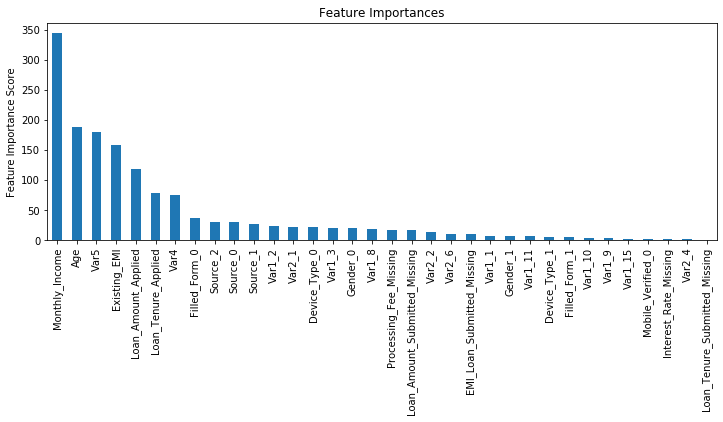

In [239]:
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=12,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0,
 objective= 'binary:logistic',
 scale_pos_weight=1,
 seed=27)
modelfit(xgb3,predictors)


Model Report
Accuracy : %.4g 0.9852332797058148
AUC Score (Train): %f 0.8388188969766808


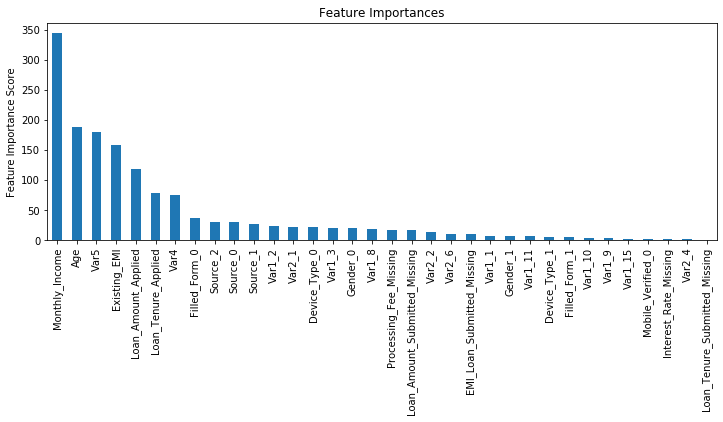

In [240]:
param = {'eta' : 0.01,
 'n_estimators':5000,
 'max_depth':5,
 'min_child_weight':12,
 'gamma':0.2,
 'subsample':0.8,
 'colsample_bytree':0.8,
 'reg_alpha':0,
 'objective':'multi:softmax',
 'num_class':7,
 'scale_pos_weight':1,
 'random_state':42}
finalxgb = XGBClassifier(
 )
modelfit(xgb3,predictors)